# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [36]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [37]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

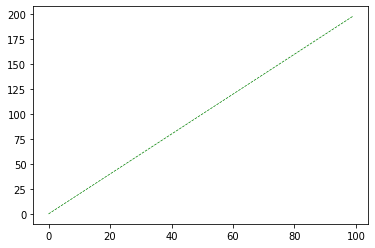

In [38]:
# Method 1
plt.plot(x, y, linewidth = 0.7, linestyle = 'dashed', color = 'g' )
plt.show()

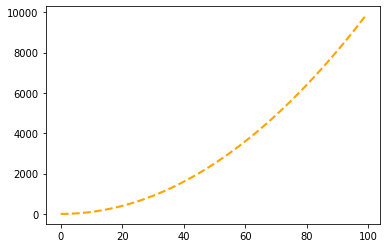

In [39]:
plt.plot(x, z, lw = 2.1, ls = '--', c = 'orange')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

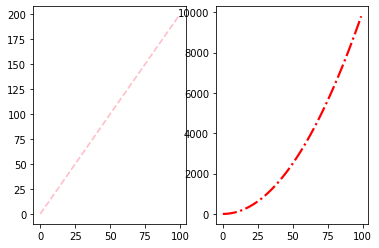

In [40]:
# Method 2
fig, ax = plt.subplots(1, 2)
ax[0].plot(x, y, linewidth = 1.7, linestyle = '--', color = 'pink')
ax[1].plot(x, z, linewidth = 2.2, linestyle = '-.', color = 'r')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

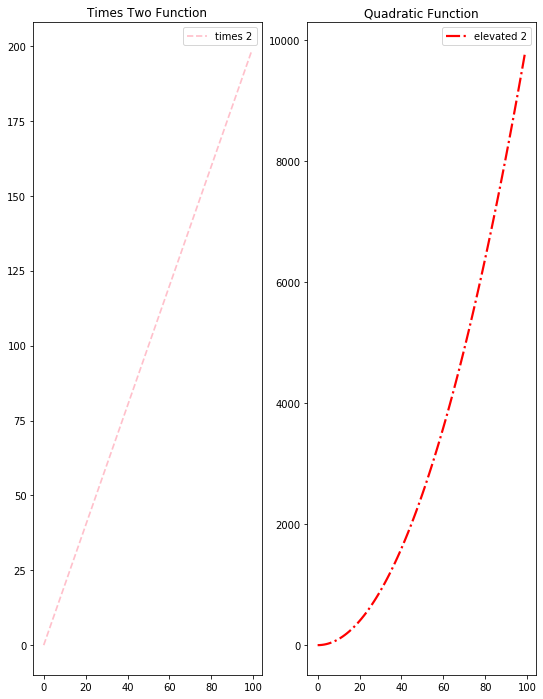

In [41]:
# your code here
fig, ax = plt.subplots(1, 2, figsize = (9,12))
ax[0].plot(x, y, linewidth = 1.7, linestyle = '--', color = 'pink', label = 'times 2')
ax[0].set_title('Times Two Function')
ax[0].legend()
ax[1].plot(x, z, linewidth = 2.2, linestyle = '-.', color = 'r', label = 'elevated 2')
ax[1].set_title('Quadratic Function')
ax[1].legend()
plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [42]:
# your code here
x = np.arange(0,100)
y = x**2
z = np.log(x)

C:\Users\55119\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


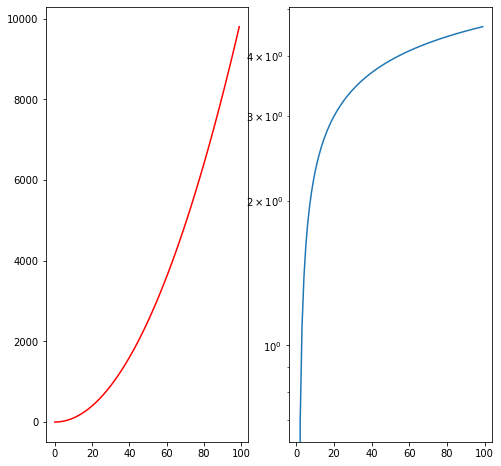

In [43]:
fig, ax = plt.subplots(1,2, figsize=(8, 8))
ax[0].plot(x, y, c = 'red')
ax[1].plot(x, z)
ax[1].set_yscale('log')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

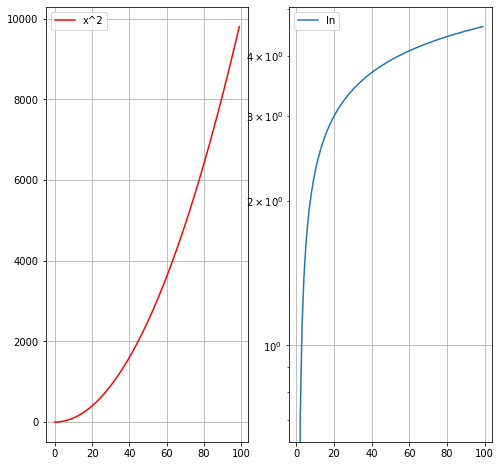

In [44]:
# your code here
fig, ax = plt.subplots(1,2, figsize=(8, 8))
ax[0].plot(x, y, c = 'red', label = 'x^2')
ax[0].legend()
ax[0].grid()
ax[1].plot(x, z, label = 'ln')
ax[1].set_yscale('log')
ax[1].legend()
ax[1].grid()
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. 
* db: `fitbit`
* table: `fitbit2`

In [45]:
# your code here
fitbit = pd.read_csv('..\data\Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [46]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [47]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


[Text(0, 0, 'work_day'), Text(0, 0, 'weekend')]

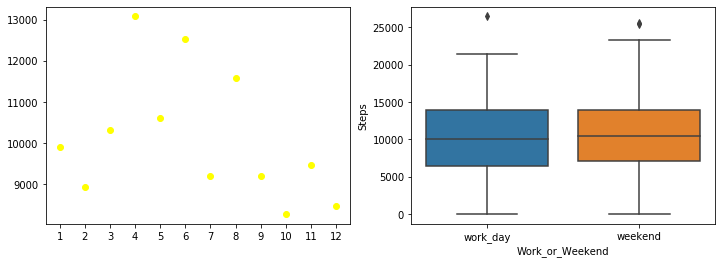

In [48]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_by_months = fitbit.groupby(by = 'Months_encoded', as_index = False).Steps.mean()
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
fig, ax = plt.subplots(1, 2, figsize = (12,4))
ax[0].scatter(steps_by_months['Months_encoded'],
           steps_by_months['Steps'],
             c = 'yellow')
ax[0].set_xticks(range(1,13))
ax[1] = sns.boxplot(fitbit['Work_or_Weekend'], fitbit['Steps'])
ax[1].set_xticklabels(['work_day','weekend'])

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [49]:
fitbit.columns[5:8]

Index(['Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active'], dtype='object')

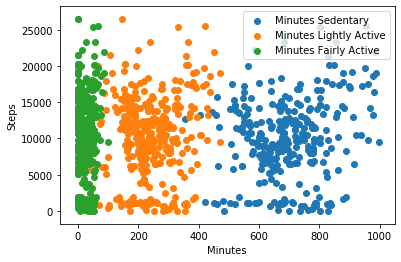

In [50]:
# your code here
for column in fitbit.columns[5:8]:
    plt.scatter(fitbit[column].sort_values(),fitbit['Steps'], label = column)
    plt.xlabel('Minutes')
    plt.ylabel('Steps')
    plt.legend()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. 
* db: `titanic`
* table: `titanic`

In [51]:
pwd

'C:\\Users\\55119\\Desktop\\DAFT-202006\\W5\\labs'

In [52]:
# your code here
titanic = pd.read_csv('..\data\titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [53]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [54]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(['int64','float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [55]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [56]:
# your code here


#### Use the right visulalization to show the distribution of column `Age`.

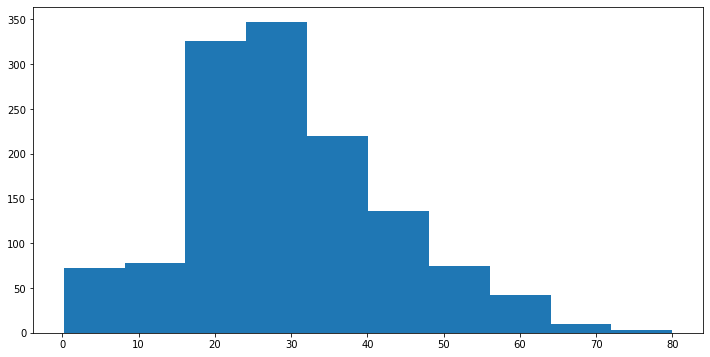

In [57]:
# your code here

fig,ax = plt.subplots(1, 1, figsize = (12,6))
ax = plt.hist(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

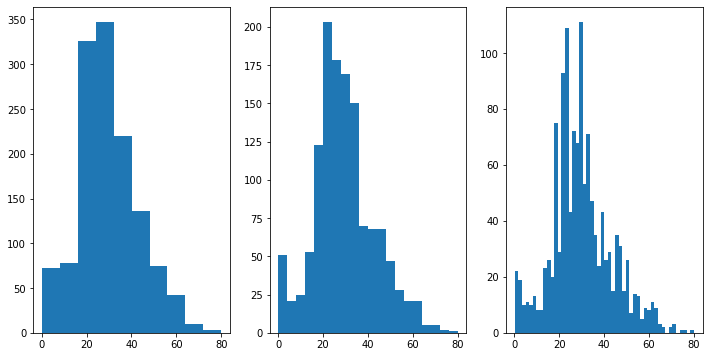

In [58]:
# your code here
fig,axes = plt.subplots(1, 3, figsize = (12,6))
axes[0].hist(titanic['Age'], bins = 10)
axes[1].hist(titanic['Age'], bins = 20)
axes[2].hist(titanic['Age'], bins = 50);

#### How does the bin size affect your plot?

In [59]:
"""
your comments here
Higher the number of bins more distributed are the data.
"""


'\nyour comments here\nHigher the number of bins more distributed are the data.\n'

#### Use seaborn to show the distribution of column `Age`.

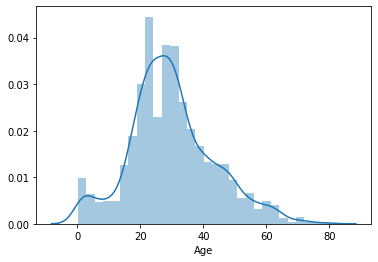

In [60]:
# your code here
sns.distplot(titanic['Age']);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

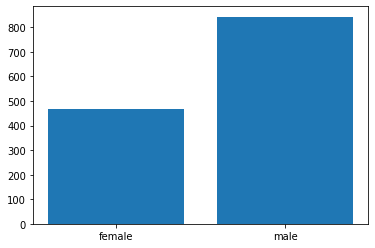

In [61]:
# Method 1 - matplotlib
# your code here
gender = titanic.groupby(by= 'Gender', as_index = False)['PassengerId'].count()
plt.bar(gender.Gender, gender.PassengerId);

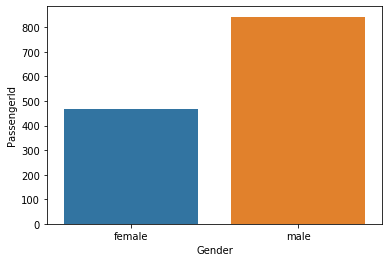

In [62]:
# Method 2 - seaborn
# your code here
sns.barplot(gender.Gender, gender.PassengerId);

#### Use the right plot to visualize the column `Pclass`.

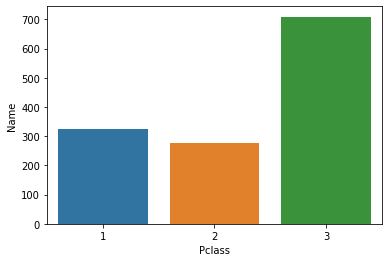

In [63]:
# your code here
pclass = titanic.groupby(by= 'Pclass', as_index = False)['Name'].count()
sns.barplot(pclass.Pclass, pclass.Name);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

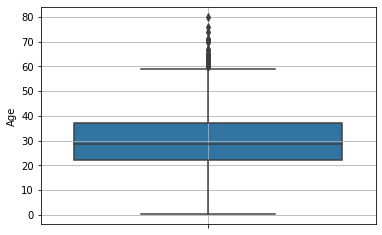

In [64]:
# your code here
sns.boxplot(titanic['Age'], orient = 'v')
plt.grid();

In [65]:
"""
your comments here
The box plot brings us the information of quartiles.
"""

'\nyour comments here\nThe box plot brings us the information of quartiles.\n'

#### What does the last plot tell you about the feature `Age`?

In [66]:
"""
your comments here
Through the box we infer that 50% of the observations are between early twenties and the late thirties.
"""

'\nyour comments here\nThrough the box we infer that 50% of the observations are between early twenties and the late thirties.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

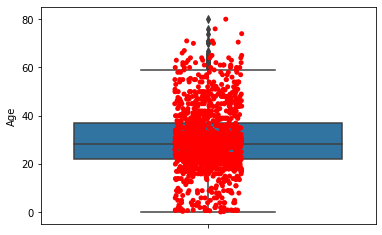

In [67]:
# your code here
# your code here
sns.boxplot(titanic['Age'], orient = 'v')
sns.stripplot(titanic['Age'], orient = 'v', color = 'red');

#### What additional information does the last plot provide about feature `Age`?

In [68]:
"""
your comments here
The strip plot bring us another way to show the distribution of the feature Age.
"""

'\nyour comments here\nThe strip plot bring us another way to show the distribution of the feature Age.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

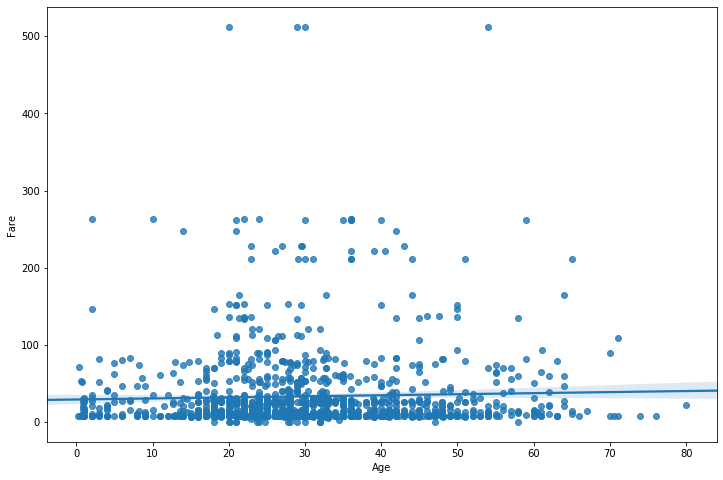

In [69]:
# Method 1 - matplotlib
# your code here
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
sns.regplot(titanic.Age. sort_values(), titanic.Fare, ax = ax);

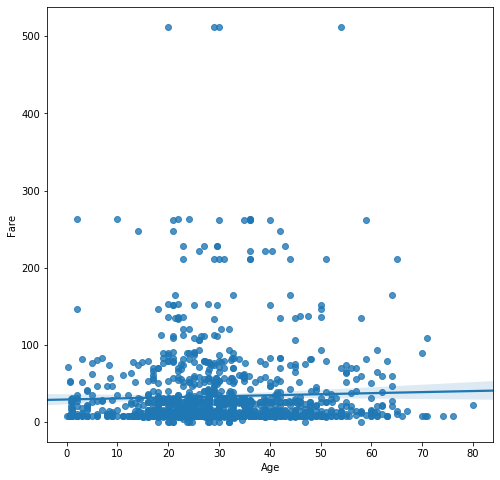

In [70]:
# Method 2 - seaborn
# your code here
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
sns.regplot(titanic.Age. sort_values(), titanic.Fare, ax=ax);

#### Plot the correlation matrix using seaborn.

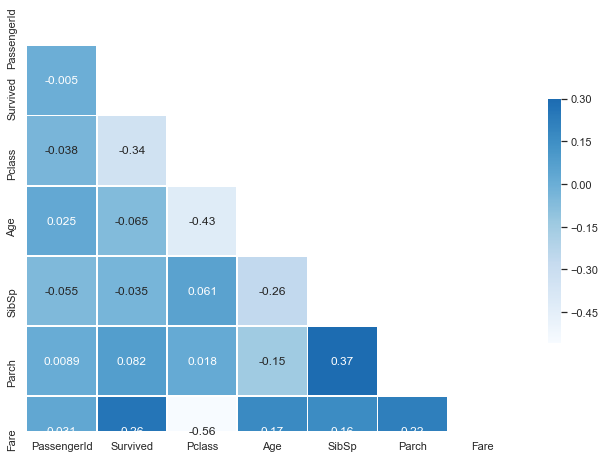

In [71]:
# your code here

sns.set(style="white")

# Compute the correlation matrix
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

#### What are the most correlated features?

In [72]:
"""
your comments here
The most related features are Parch(# of parents / children aboard the Titanic) and SibSP(# of siblings / 
spouses aboard the Titanic).
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

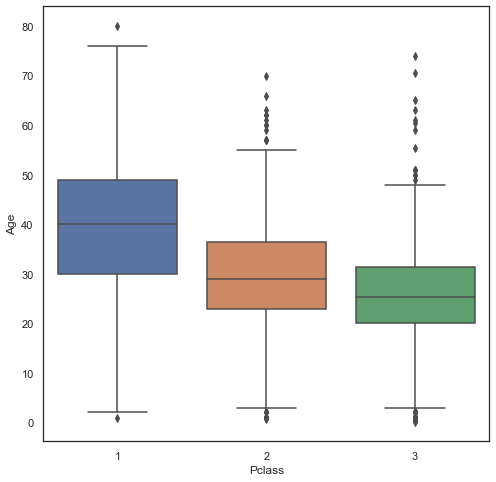

In [75]:
# your code here
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
sns.boxplot(titanic['Pclass'], titanic['Age'], ax=ax);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

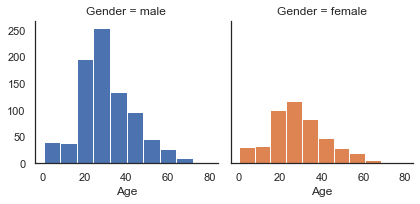

In [92]:
# your code here
g = sns.FacetGrid(titanic, col="Gender", hue = 'Gender')

g = g.map(plt.hist, 'Age')